In [12]:
import random
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels import api as sm

In [15]:
# Filter warnings
warnings.filterwarnings('ignore')

# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

# Loads the Dataframe

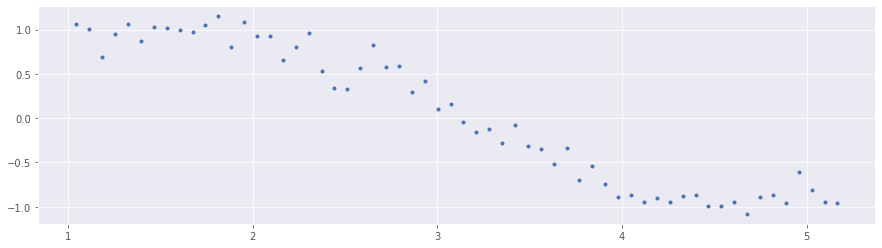

In [5]:
x = np.array([i*np.pi/180 for i in range(60, 300, 4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])
plt.plot(data['x'], data['y'], '.')
plt.show()

In [7]:
for i in range(2, 16):
    colname = 'x_%d' % i
    data[colname] = data['x']**i
    
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [9]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
   
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
   
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
   
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

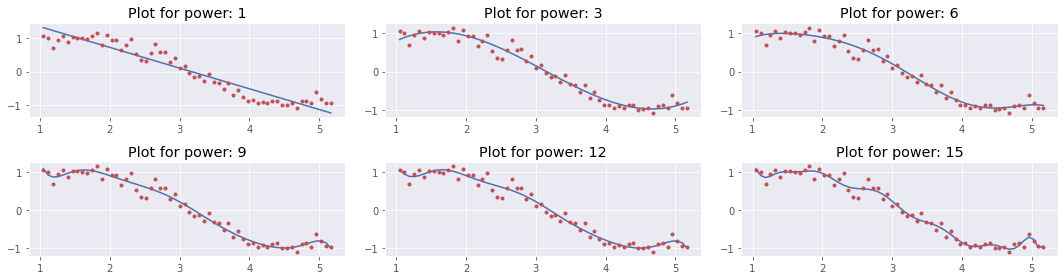

In [16]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [17]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.280316,1.962856,-0.619575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.276677,1.914055,-0.582551,-0.005959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.103352,-1.080696,3.031566,-1.285528,0.137292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.078576,-0.265704,1.686922,-0.531752,-0.035678,0.013919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.018574,2.991504,-5.117762,4.724612,-1.928562,0.334735,-0.020653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.990074,-2.801552,9.516646,-9.713203,5.226088,-1.554893,0.233099,-0.013613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.928265,19.302068,-55.95233,68.956179,-44.631906,16.514842,-3.528135,0.40451,-0.019227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.91761,43.16761,-137.012782,183.82533,-133.499299,57.676673,-15.252654,2.416543,-0.210019,0.007677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.874941,167.835068,-614.513367,963.402859,-846.436535,460.904865,-161.848584,36.75775,-5.220804,0.421902,-0.014815,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.874578,137.717172,-486.1252,726.132868,-595.880782,293.255567,-87.456344,14.54616,-0.806073,-0.138205,0.026223,-0.001321,NaN,NaN,NaN,NaN,NaN


In [ ]:
def ridge_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2, power+1)])
   
    # Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
   
    # Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
        
    # Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

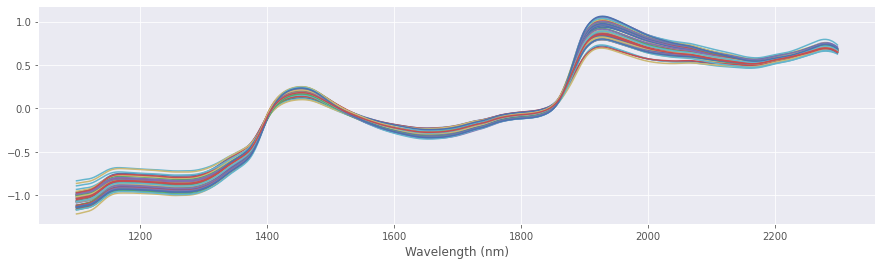

In [32]:
df = pd.read_csv("./datasets/peach_spectra_brix.csv")
X = df.values[:, 1:]
y = df['Brix']
w1 = np.arange(1100, 2300, 2)

plt.plot(w1, X.T)
plt.xlabel("Wavelength (nm)")
plt.show()

In [ ]:
from linearmodels.datasets import jobstraining

df = jobstraining.load()
year = pd.Categorical(data.year)
data = data.set_index(['fscore', 'year'])
data['year'] = year
exog_vars = ['grant', 'employ']
exog = sm.add_constant(data[exog_vars])